### Reference: [Python Data Science Handbook]( https://jakevdp.github.io/PythonDataScienceHandbook)

## Linear Discriminant Analysis

The general LDA approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).

So, in a nutshell, often the goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace k (where $k\leq n−1$) while maintaining the class-discriminatory information.
In general, dimensionality reduction does not only help reducing computational costs for a given classification task, but it can also be helpful to avoid overfitting by minimizing the error in parameter estimation (“curse of dimensionality”).

### Principal Component Analysis vs. Linear Discriminant Analysis

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA is an ``unsupervised`` algorithm, since it ``ignores``class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is ``supervised`` and computes the directions (``linear discriminants``) that will represent the axes that that maximize the separation between multiple classes.

Although it might sound intuitive that LDA is superior to PCA for a multi-class classification task where the class labels are known, this might not always be the case.

For example, comparisons between classification accuracies for image recognition after using PCA or LDA show that PCA tends to outperform LDA if the number of samples per class is relatively small [PCA vs LDA](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?arnumber=908974). In practice, it is also not uncommon to use both LDA and PCA in combination: E.g., PCA for dimensionality reduction followed by an LDA.
![](figures/pca_lda_concept.png)

### What is a “good” feature subspace?

Let’s assume that our goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a $k$-dimensional subspace (where $k<d$). So, how do we know what size we should choose for $k$ ($k$ = the number of dimensions of the new feature subspace), and how do we know if we have a feature space that represents our data *well*?

Later, we will compute eigenvectors (the components) from our data set and collect them in a so-called scatter-matrices (i.e., the in-between-class scatter matrix and within-class scatter matrix).
Each of these eigenvectors is associated with an eigenvalue, which tells us about the *length* or *magnitude* of the eigenvectors.

If we would observe that all eigenvalues have a similar magnitude, then this may be a good indicator that our data is already projected on a *good* feature space.

And in the other scenario, if some of the eigenvalues are much much larger than others, we might be interested in keeping only those eigenvectors with the highest eigenvalues, since they contain more information about our data distribution. Vice versa, eigenvalues that are close to $0$ are less informative and we might consider dropping those for constructing the new feature subspace

## Linear and Quadratic Discriminant Analysis

In scikit-learn, ``LinearDiscriminantAnalysis`` can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes (in a precise sense discussed in the mathematics section below). The dimension of the output is necessarily less than the number of classes, so this is in general a rather strong dimensionality reduction, and only makes sense in a multiclass setting.

This is implemented in the ``transform`` method. The desired dimensionality can be set using the ``n_components`` parameter. This parameter has no influence on the ``fit`` and ``predict`` methods.

### Mathematical formulation of the LDA and QDA classifiers

Both LDA and Quadratic Discriminant Analysis (QDA) can be derived from simple probabilistic models which model the class conditional distribution of the data $P(X|y=k)$ for each class $k$. Predictions can then be obtained by using Bayes rule, for each training sample $x\in \mathcal{R}^d$:

$$
P(y=k|x)=\frac{P(x|y=k)P(y=k)}{P(x)}=\frac{P(x|y=k)P(y=k)}{\sum_l P(x|y=l)P(y=l)}
$$
 
 
and we select the class which maximizes this posterior probability.

More specifically, for linear and quadratic discriminant analysis, $P(x|y)$ is modeled as a multivariate Gaussian distribution with density:

$$
P(x|y=k)=\frac{1}{(2\pi)^{d/2}\lvert\Sigma_k\lvert^{1/2}}
\exp\left(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)\right) 
$$ 

where $d$ is the number of features.



### QDA

According to the model above, the log of the posterior is:
\begin{align}
\log P(y=k|x)&=\log P(x|y=k)+\log P(y=k)+\text{const} \\
        &=-\frac{1}{2}\log|\Sigma_k|-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+\log P(y=k)+\text{const} 
\end{align}
 
where the constant term $\text{const}$ corresponds to the denominator $P(x)$, in addition to other constant terms from the Gaussian. The predicted class is the one that maximises this log-posterior.

#### Note: Relation with Gaussian Naive Bayes

If in the QDA model one assumes that the covariance matrices are diagonal, then the inputs are assumed to be conditionally independent in each class, and the resulting classifier is equivalent to the Gaussian Naive Bayes classifier ``naive_bayes.GaussianNB``.

### LDA

LDA is a special case of QDA, where the Gaussians for each class are assumed to share the same covariance matrix: $\Sigma_k=\Sigma$ for all $k$. This reduces the log posterior to:

$$
\log P(y=k|x)
        =-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)+\log P(y=k)+\text{const} 
$$
 
The term $(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)$ corresponds to the [Mahalanobis Distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) between the sample $x$ and the mean $\mu_k$. The Mahalanobis distance tells how close $x$ is from $\mu_k$, while also accounting for the variance of each feature. We can thus interpret LDA as assigning  to the class whose mean is the closest in terms of Mahalanobis distance, while also accounting for the class prior probabilities.

The log-posterior of LDA can also be written 3 as:

$$
\log P(y=k|x)=\omega_k^Tx+\omega_{k0}+\text{const}
$$

where $\omega_k=\Sigma^{-1}\mu_k$ and $\omega_{k0}=-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+\log P(y=k)$. These quantities correspond to the `coef_` and `intercept_` attributes, respectively.

From the above formula, it is clear that LDA has a linear decision surface. In the case of QDA, there are no assumptions on the covariance matrices $\Sigma_k$ of the Gaussians, leading to quadratic decision surfaces.

### Summarizing the LDA approach in 5 steps

Listed below are the 5 general steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

1. Compute the $d$-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors ($e_1, e_2, \cdots, e_d$) and corresponding eigenvalues ($\lambda_1,\lambda_2, \cdots, \lambda_d$) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d\times k$ dimensional matrix $W$ (where every column represents an eigenvector).
5. Use this $d\times k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: $Y=X×W$ (where $X$ is a $n\times d$-dimensional matrix representing the $n$ samples, and $y$ are the transformed $n\times k$-dimensional samples in the new subspace).

### About the Iris dataset
For the following tutorial, we will be working with the famous *Iris* dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

**Reference:** Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.
The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

![](figures/iris_petal_sepal.png)

In [23]:
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}


df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, [0,1,2,3]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

In [26]:
print(X.shape)
print(y)

(150, 4)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


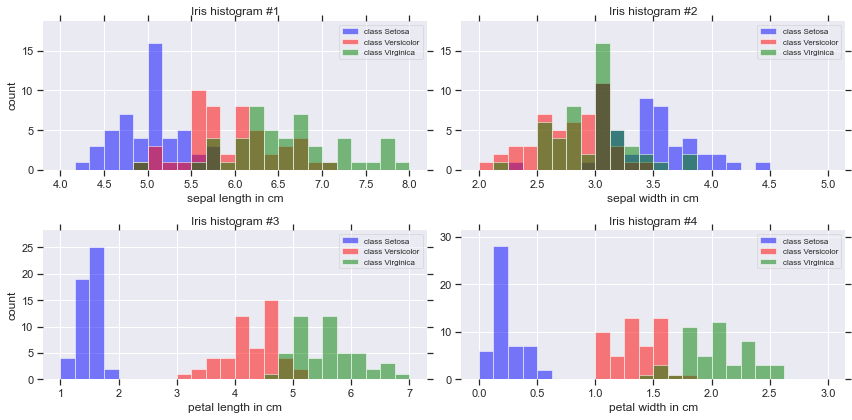

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

From just looking at these simple graphical representations of the features, we can already tell that the petal lengths and widths are likely better suited as potential features two separate between the three flower classes. In practice, instead of reducing the dimensionality via a projection (here: LDA), a good alternative would be a feature selection technique. For low-dimensional datasets like Iris, a glance at those histograms would already be very informative. Another simple, but very useful technique would be to use feature selection algorithms; in case you are interested, a more detailed description on sequential feature selection algorithms can be found [here](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/), and scikit-learn also implements a nice selection of alternative [approaches](https://scikit-learn.org/stable/modules/feature_selection.html). For a high-level summary of the different approaches, see this short post on [“What is the difference between filter, wrapper, and embedded methods for feature selection?”](https://sebastianraschka.com/faq/docs/feature_sele_categories.html).

### Normality assumptions

It should be mentioned that LDA assumes normal distributed data, features that are statistically independent, and identical covariance matrices for every class. However, this only applies for LDA as classifier and LDA for dimensionality reduction can also work reasonably well if those assumptions are violated. And even for classification tasks LDA seems can be quite robust to the distribution of the data.

### Summarizing the LDA approach in 5 steps

Listed below are the 5 general steps for performing a linear discriminant analysis; we will explore them in more detail in the following sections.

#### Step 1: Computing mean vectors for all classes 
$$
m_i=\frac{1}{n_i} \sum_{x\in D_i}^{n_i}x_k
$$
Note: $m_i\in\mathcal{R}^d$.

#### Step 2.1 Compute within-class scatter matrix 
$$
S_W=\sum_{i=1}^{c}S_i
$$
where
$$
S_i=\sum_{x\in C_i}(x-m_i)(x-m_i)^T
$$

Note 1: $S_W\in \mathcal{R}^{d\times d}$.

Note 2: In many caes (especially for high dimensional data), $S_W$ is nearly singular.

#### Step 2.2 Compute between-class scatter matrix 
$$
S_B=\sum_{i=1}^{c}n_i(m_i-m)(m_i-m)^T
$$
where $m$ is overall mean.

Note: $S_B\in \mathcal{R}^{d\times d}$.

#### Step 2.2 Cost function
$$
\max_{v:\lVert v\rVert=1}\frac{v^T S_B v}{v^T S_W v}
$$

#### Step 3 Solve the following generalized eigenvalue problem 
Compute the eigenvectors ($e_1, e_2, \cdots, e_d$) and corresponding eigenvalues ($\lambda_1,\lambda_2, \cdots, \lambda_d$) for the scatter matrices.
$$
S_W^{-1}S_B v=\lambda v
$$

Note: $\text{rank}(S_B)\leq c-1$ where $c$ is the number of classes. As a result, there are at most $c-1$ nonzero eigenvalues which will be used as the disciminiatory directions.

#### Step 4.1 Sort eigenvalues and choose the top ones
Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d\times k$ dimensional matrix $W$ (where every column represents an eigenvector).

#### Step 5 Transforming the samples onto the new subspace
$$
Y=X\times W
$$

where $X$ is $n\times d$-dimensional, and $W$ is $d\times k$. As a result, $Y$ is $n\times k$-dimensional.

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [29]:
X_lda_sklearn.shape

(150, 2)

In [30]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label, marker, color in zip(
        range(1,4), ('^', 's', 'o'), ('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid(True)
    plt.tight_layout
    plt.show()

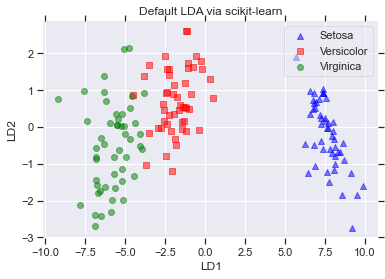

In [31]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [32]:
sklearn_lda.explained_variance_ratio_

array([0.99147248, 0.00852752])

In [33]:
sklearn_lda.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

The scatter plot above represents our new feature subspace that we constructed via LDA. We can see that the first linear discriminant “LD1” separates the classes quite nicely. However, the second discriminant, “LD2”, does not add much valuable information, which we’ve already concluded when we looked at the ranked eigenvalues is step 4.

### A comparison of PCA and LDA

In [34]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid(True)
    
    plt.show()

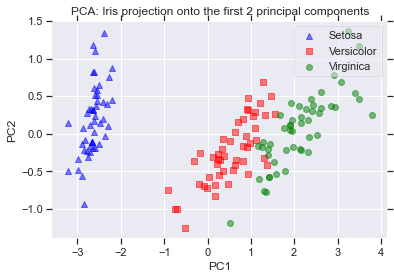

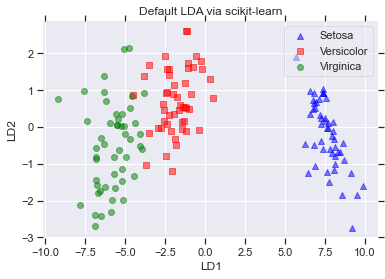

In [35]:
plot_pca()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

The plots above nicely confirms what we have discussed before: Where the PCA accounts for the most variance in the whole dataset, the LDA gives us the axes that account for the most variance between the individual classes.

### A Note About Standardization

I wanted to clarify that feature scaling such as standardization does not change the overall results of an LDA and thus may be optional. Yes, the scatter matrices will be different depending on whether the features were scaled or not. In addition, the eigenvectors will be different as well. However, the important part is that the eigenvalues will be exactly the same as well as the final projects – the only difference you’ll notice is the scaling of the component axes. 